# **Análisis sobre el aumento de violencia doméstica en tiempos de covid19**




El presente proyecto busca explorar los efectos producidos por la pandemia COVID-19, en materia de violencia  intrafamilar en Argentina, todo esto enmarcado en los periodos de aislamiento a partir del año 2020.

Debido a la poca información sobre pandemias, el proceso de contención de la misma fue experimental en cuanto a medidas que se iban implementando según la nueva información que se iba obteniendo, por lo que no se podían predecir las consecuencias a mediano y largo plazo de estas; por ejemplo la restricción de salida y el aislamiento en el domicilio, hecho que produjo consecuencias en el ámbito familiar argentino, específicamente en temas de violencia intrafamiliar. 
En base a lo anterior, el presente trabajo busca indagar si existe una relación entre las denuncias y crímenes en torno a violencia intrafamiliar y el aislamiento social.  

La idea principal es correlacionar las bases de datos y poder encontrar una relación entre las variables, para poder responder a la pregunta ¿Existe un aumento de la violencia doméstica a causa del encierro por pandemia?


" Las bases de datos las obtubimos de https://www.kaggle.com y https://www.datos.gob.ar "	


### **Objetivos**:

-Explorar la tendencia de la violencia intrafamiliar  en Argentina durante el aislamiento por Covid-19                              
-Correlacionar la tendencia de la violencia intrafamiliar en Argentina con las medidas de contención sanitaria por Covid-19

## Importación de librerías


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io


## Lectura de los dataset


In [ ]:
from google.colab import drive
from google.colab import files

drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/USAMOS ESTOS'
#file = files.upload()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/USAMOS ESTOS


In [ ]:
!ls

'Data COVID Casos Argentina completo 2020 y 2021.xlsx'
 llamados-atendidos-violencia-familiar-unificado-201701-202202.xlsx


## Primeros pasos

In [ ]:
#tipos de datos de cada columna para que pandas pueda interpretarlo bien
dtypes = {"caso_id" : float,
          "llamante_descripcion" : str,
          "llamante_genero" : str,
          "llamante_vinculo_ninios_presentes" : str,
          "violencia_tipo" : str,
          "victima_edad" : float,
          "victima_rango_etario" : str,
          "victima_genero" : str,
          "victima_cantidad" : float,
          "agresor_cantidad" : float,
          "agresor_genero" : str,
          "agresor_relacion_victima" : str,
          "llamado_derivacion" : str,
          "llamado_fecha" : str,
          "llamado_hora" : str,
          }

#columnas que extraemos del archivo sobre covid
cols_covid = ["fecha","dia_cuarentena_dnu260"]

#cargamos los excel a dataframes
ATENDIDOS = pd.read_excel("llamados-atendidos-violencia-familiar-unificado-201701-202202.xlsx", 
                          dtype=dtypes, na_values=["Sin dato"])
COVID = pd.read_excel("Data COVID Casos Argentina completo 2020 y 2021.xlsx",
                      usecols=cols_covid, dtype={"dia_cuarentena_dnu260" : float})

#completamos los datos vacios
ATENDIDOS = ATENDIDOS.fillna("Sin dato")
COVID = COVID.fillna(0)

#pasamos de string a datetime para manipularlo mejor
ATENDIDOS["fecha"] =  pd.to_datetime(ATENDIDOS['llamado_fecha'] + ' ' + ATENDIDOS['llamado_hora'])
COVID["fecha"] = pd.to_datetime(COVID["fecha"])

# Exploramos el dataset de llamados por violencia familiar

In [ ]:
#revisamos los tipos de datos que tiene el dataset
ATENDIDOS.dtypes

caso_id                                     float64
llamante_descripcion                         object
llamante_genero                              object
llamante_vinculo_ninios_presentes            object
violencia_tipo                               object
victima_edad                                 object
victima_rango_etario                         object
victima_genero                               object
victima_cantidad                            float64
agresor_cantidad                            float64
agresor_genero                               object
agresor_relacion_victima                     object
llamado_derivacion                           object
llamado_fecha                                object
llamado_hora                                 object
llamado_provincia                            object
llamado_provincia_id                         object
fecha                                datetime64[ns]
dtype: object

In [ ]:
ATENDIDOS.head()

,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,llamado_provincia,llamado_provincia_id,fecha
0,344552.0,Comisaría,Masculino,Otra/o no familiar,Física y psicológica,27.0,18 a 29 años,Femenino,3.0,1.0,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,2017-01-01 00:00:00,01:37:00,Sin dato,Sin dato,2017-01-01 01:37:00
1,344553.0,Comisaría,Femenino,Sin datos,Física y psicológica,Sin dato,Sin dato,Femenino,2.0,1.0,Masculino,Hermano/a,Llamante solicitó información y/o orientación,2017-01-01 00:00:00,06:42:00,Sin dato,Sin dato,2017-01-01 06:42:00
2,344554.0,Víctima,Femenino,Madre,Física y psicológica,Sin dato,Sin dato,Femenino,1.0,1.0,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01 00:00:00,06:48:00,Sin dato,Sin dato,2017-01-01 06:48:00
3,344555.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Sin dato,Sin dato,Femenino,1.0,1.0,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01 00:00:00,06:54:00,Sin dato,Sin dato,2017-01-01 06:54:00
4,344556.0,Comisaría,Masculino,Otra/o no familiar,Psicológica,Sin dato,Sin dato,Masculino,1.0,1.0,Femenino,Madre,Llamante solicitó información y/o orientación,2017-01-01 00:00:00,07:11:00,Sin dato,Sin dato,2017-01-01 07:11:00


In [ ]:
print('Cantidad de filas y columnas de ATENDIDOS:', ATENDIDOS.shape)

Cantidad de filas y columnas de ATENDIDOS: (45703, 18)


In [ ]:
print('Nombre columnas de ATENDIDOS:', ATENDIDOS.columns)

Nombre columnas de ATENDIDOS: Index(['caso_id', 'llamante_descripcion', 'llamante_genero',
       'llamante_vinculo_ninios_presentes', 'violencia_tipo', 'victima_edad',
       'victima_rango_etario', 'victima_genero', 'victima_cantidad',
       'agresor_cantidad', 'agresor_genero', 'agresor_relacion_victima',
       'llamado_derivacion', 'llamado_fecha', 'llamado_hora',
       'llamado_provincia', 'llamado_provincia_id', 'fecha'],
      dtype='object')


In [ ]:
#eliminamos las columnas que creemos NO estarán relacionadas a nuestro target
ATENDIDOS = ATENDIDOS.drop(['llamante_genero','victima_edad','agresor_cantidad',
                            'llamado_provincia','llamado_provincia_id'], axis=1)

In [ ]:
ATENDIDOS.head()

,caso_id,llamante_descripcion,llamante_vinculo_ninios_presentes,violencia_tipo,victima_rango_etario,victima_genero,victima_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,fecha
0,344552.0,Comisaría,Otra/o no familiar,Física y psicológica,18 a 29 años,Femenino,3.0,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,2017-01-01 00:00:00,01:37:00,2017-01-01 01:37:00
1,344553.0,Comisaría,Sin datos,Física y psicológica,Sin dato,Femenino,2.0,Masculino,Hermano/a,Llamante solicitó información y/o orientación,2017-01-01 00:00:00,06:42:00,2017-01-01 06:42:00
2,344554.0,Víctima,Madre,Física y psicológica,Sin dato,Femenino,1.0,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01 00:00:00,06:48:00,2017-01-01 06:48:00
3,344555.0,Víctima,No hay niñas/os,Física y psicológica,Sin dato,Femenino,1.0,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01 00:00:00,06:54:00,2017-01-01 06:54:00
4,344556.0,Comisaría,Otra/o no familiar,Psicológica,Sin dato,Masculino,1.0,Femenino,Madre,Llamante solicitó información y/o orientación,2017-01-01 00:00:00,07:11:00,2017-01-01 07:11:00


## Cantidad de llamados por año

      count
año        
2017   9887
2018   8054
2019   7819
2020   9088
2021   9367
2022   1488


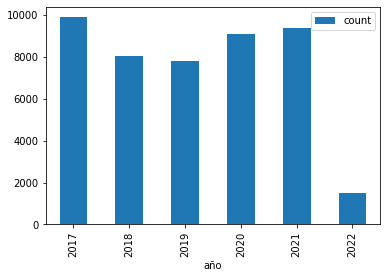

In [ ]:
llamados_año = ATENDIDOS.groupby([ATENDIDOS['fecha'].dt.year.rename('año')]).agg({'count'})["caso_id"]
print(llamados_año)
llamados_año.plot(kind='bar')

## Cantidad de llamados por mes

In [ ]:
count_llamados_mes = ATENDIDOS.groupby([ATENDIDOS['fecha'].dt.year.rename('año'), ATENDIDOS['fecha'].dt.month.rename('mes')]).agg({'count'})["caso_id"]
count_llamados_mes

count
año  mes       
2017 1     1166
     2      948
     3     1110
     4      868
     5      815
...         ...
2021 10     767
     11     735
     12     765
2022 1      758
     2      730

[62 rows x 1 columns]

## Cantidad de llamados por día

In [ ]:
count_llamados_mes = ATENDIDOS.groupby([ATENDIDOS['fecha'].dt.year.rename('año'), ATENDIDOS['fecha'].dt.month.rename('mes')]).agg({'count'})["caso_id"]
count_llamados_dia = ATENDIDOS['fecha'].groupby(ATENDIDOS['fecha'].dt.floor('d')).size().reset_index(name='llamados')
count_llamados_dia

,fecha,llamados
0,2017-01-01,35
1,2017-01-02,56
2,2017-01-03,41
3,2017-01-04,44
4,2017-01-05,38
...,...,...
1878,2022-02-24,37
1879,2022-02-25,20
1880,2022-02-26,25
1881,2022-02-27,24


## ¿Quién llama?

In [ ]:
ATENDIDOS = ATENDIDOS[ATENDIDOS['llamante_descripcion']!='NS/NC']

In [ ]:
ATENDIDOS['llamante_descripcion'] = ATENDIDOS['llamante_descripcion'].replace(['Otra Institución'],['Otra institución'])
ATENDIDOS['llamante_descripcion'] = ATENDIDOS['llamante_descripcion'].replace(['Otro/a particular'],['Otro/a'])
ATENDIDOS['llamante_descripcion'] = ATENDIDOS['llamante_descripcion'].replace(['Otra/o sobre una situación de conflicto familiar'],['Otro/a'])
cantidad_llamante = ATENDIDOS['llamante_descripcion'].value_counts()
porcentaje_llamante = round((ATENDIDOS['llamante_descripcion'].value_counts()/ATENDIDOS['llamante_descripcion'].value_counts().sum()) * 100,3)
df1 = pd.DataFrame(cantidad_llamante)
df2 = pd.DataFrame({"porcentaje_llamante" : porcentaje_llamante})
df2["porcentaje_llamante"] = df2["porcentaje_llamante"].astype(str) + '%' 
pd.concat([df1,df2],axis=1)

,llamante_descripcion,porcentaje_llamante
Víctima,13331,38.032%
Comisaría,10793,30.791%
Familiar,5510,15.72%
Vecina/o,1973,5.629%
Otro/a,1415,4.037%
Otra institución,1241,3.54%
Hospital,613,1.749%
Agresor/a,154,0.439%
Defensoría,21,0.06%
Profesionales de la Línea 137,1,0.003%


## ¿Cuál es el tipo de violencia?


In [ ]:
ATENDIDOS = ATENDIDOS[ATENDIDOS['violencia_tipo']!='No aplica']
ATENDIDOS = ATENDIDOS[ATENDIDOS['violencia_tipo']!='Sin dato']

In [ ]:
ATENDIDOS['violencia_tipo'] = ATENDIDOS['violencia_tipo'].replace(['No Aplica'],['No aplica'])
ATENDIDOS['violencia_tipo'] = ATENDIDOS['violencia_tipo'].replace(['Económica, física y psicológica'],['Física, psicológica y económica'])
ATENDIDOS['violencia_tipo'] = ATENDIDOS['violencia_tipo'].replace(['Económica, Física y psicológica'],['Física, psicológica y económica'])
cantidad_violencia = ATENDIDOS['violencia_tipo'].value_counts()
porcentaje_violencia = round((ATENDIDOS['violencia_tipo'].value_counts()/ATENDIDOS['violencia_tipo'].value_counts().sum()) * 100,2)
df3 = pd.DataFrame(cantidad_violencia)
df4 = pd.DataFrame({"violencia_porcentaje" : porcentaje_violencia})
df4["violencia_porcentaje"] = df4["violencia_porcentaje"].astype(str) + '%' 
pd.concat([df3,df4],axis=1)

,violencia_tipo,violencia_porcentaje
Física y psicológica,20809,59.42%
Psicológica,12501,35.7%
"Física, psicológica y económica",596,1.7%
Económica y psicológica,377,1.08%
"Física, sexual y psicológica",364,1.04%
Sexual y psicológica,241,0.69%
Otras,92,0.26%
No es un caso de Violencia Familiar,18,0.05%
"Sexual, económica y psicológica",15,0.04%
"Física, sexual, psicológica y económica",5,0.01%


## Cantidad de víctimas de la denuncia


In [ ]:
ATENDIDOS = ATENDIDOS[ATENDIDOS['victima_cantidad']!=0]

      victima_cantidad porcentaje_victimas
1.0              21771              62.45%
2.0               6743              19.34%
3.0               3840              11.01%
4.0               1590               4.56%
5.0                557                1.6%
6.0                220               0.63%
7.0                 80               0.23%
8.0                 38               0.11%
9.0                 12               0.03%
10.0                 6               0.02%
11.0                 2               0.01%
13.0                 2               0.01%
12.0                 2               0.01%


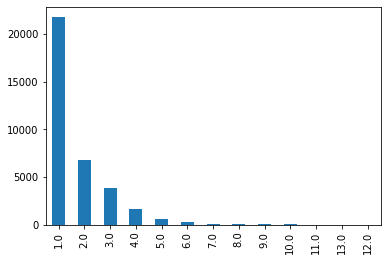

In [ ]:
cantidad_victimas = ATENDIDOS['victima_cantidad'].value_counts()
porcentaje_victimas = round((ATENDIDOS['victima_cantidad'].value_counts()/ATENDIDOS['victima_cantidad'].value_counts().sum()) * 100,2)
df5 = pd.DataFrame(cantidad_victimas)
df6 = pd.DataFrame({"porcentaje_victimas" : porcentaje_victimas})
df6["porcentaje_victimas"] = df6["porcentaje_victimas"].astype(str) + '%' 
print(pd.concat([df5,df6],axis=1))
cantidad_victimas.plot(kind='bar')

## ¿Hay niños presentes? ¿Otro familiar?


In [ ]:
ATENDIDOS = ATENDIDOS[ATENDIDOS['llamante_vinculo_ninios_presentes']!='Sin datos']

In [ ]:
ATENDIDOS['llamante_vinculo_ninios_presentes'] = ATENDIDOS['llamante_vinculo_ninios_presentes'].replace(['Otra/o no familiar'],['Otro/a no familiar'])
ATENDIDOS['llamante_vinculo_ninios_presentes'] = ATENDIDOS['llamante_vinculo_ninios_presentes'].replace(['Otra/o familiar'],['Otro familiar'])
ATENDIDOS['llamante_vinculo_ninios_presentes'] = ATENDIDOS['llamante_vinculo_ninios_presentes'].replace(['Hermana/o'],['Hermano/a'])
ATENDIDOS['llamante_vinculo_ninios_presentes'] = ATENDIDOS['llamante_vinculo_ninios_presentes'].replace(['NS/NC'],['Sin datos'])
cantidad_familiares = ATENDIDOS['llamante_vinculo_ninios_presentes'].value_counts()
porcentaje_familiares = round((ATENDIDOS['llamante_vinculo_ninios_presentes'].value_counts()/ATENDIDOS['llamante_vinculo_ninios_presentes'].value_counts().sum()) * 100,2)
df7 = pd.DataFrame(cantidad_familiares)
df8 = pd.DataFrame({"porcentaje" : porcentaje_familiares})
df8["porcentaje"] = df8["porcentaje"].astype(str) + '%' 
pd.concat([df7,df8],axis=1)

,llamante_vinculo_ninios_presentes,porcentaje
Otro/a no familiar,9601,31.41%
No hay niñas/os,8846,28.94%
Madre,7375,24.13%
Otro familiar,2751,9.0%
Padre,1193,3.9%
Hermano/a,770,2.52%
Padrastro,27,0.09%


## ¿Qué edad tiene la víctima?


In [ ]:
ATENDIDOS = ATENDIDOS[ATENDIDOS['victima_rango_etario']!='Sin dato']

                victima_rango_etario porcentaje_rango_etario
18 a 29 años                    6525                  29.25%
30 a 39 años                    4921                  22.06%
40 a 49 años                    3153                  14.13%
Más de 60 años                  2147                   9.62%
12 a 17 años                    1873                    8.4%
50 a 59 años                    1344                   6.02%
6 a 11 años                     1278                   5.73%
0 a 5 años                      1069                   4.79%


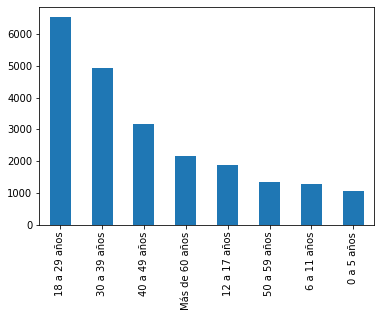

In [ ]:
ATENDIDOS['victima_rango_etario'] = ATENDIDOS['victima_rango_etario'].replace(['06 a 11 años'],['6 a 11 años'])
rango_etario = ATENDIDOS['victima_rango_etario'].value_counts()
porcentaje_etario = round((ATENDIDOS['victima_rango_etario'].value_counts()/ATENDIDOS['victima_rango_etario'].value_counts().sum()) * 100,2)
df9 = pd.DataFrame(rango_etario)
df10 = pd.DataFrame({"porcentaje_rango_etario" : porcentaje_etario})
df10["porcentaje_rango_etario"] = df10["porcentaje_rango_etario"].astype(str) + '%' 

print(pd.concat([df9,df10],axis=1))
rango_etario.plot(kind='bar')

## ¿Qué género tiene la víctima?


In [ ]:
ATENDIDOS=ATENDIDOS[ATENDIDOS['victima_genero']!='NS/NC']

             victima_genero porcentaje_genero_victima
Femenino              19178                    85.96%
Masculino              3098                    13.89%
Transgénero              34                     0.15%


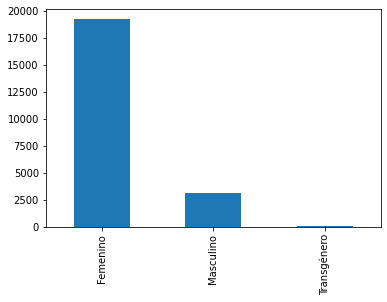

In [ ]:
genero_victima = ATENDIDOS['victima_genero'].value_counts()
porcentaje_genero_victima = round((ATENDIDOS['victima_genero'].value_counts()/ATENDIDOS['victima_genero'].value_counts().sum()) * 100,2)
df11 = pd.DataFrame(genero_victima)
df12 = pd.DataFrame({"porcentaje_genero_victima":porcentaje_genero_victima})
df12["porcentaje_genero_victima"] = df12["porcentaje_genero_victima"].astype(str) + '%' 
print(pd.concat([df11,df12],axis=1))
genero_victima.plot(kind='bar')

## ¿Qué género tiene el agresor?


In [ ]:
ATENDIDOS=ATENDIDOS[ATENDIDOS['agresor_genero']!='NS/NC']

             agresor_genero porcentaje_genero_agresor
Masculino             17548                    80.62%
Femenino               4211                    19.35%
Transgénero               7                     0.03%


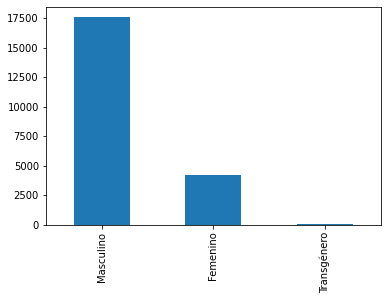

In [ ]:
genero_agresor = ATENDIDOS['agresor_genero'].value_counts()
porcentaje_genero_agresor = round((ATENDIDOS['agresor_genero'].value_counts()/ATENDIDOS['agresor_genero'].value_counts().sum()) * 100,2)
df13 = pd.DataFrame(genero_agresor)
df14 = pd.DataFrame({"porcentaje_genero_agresor":porcentaje_genero_agresor})
df14["porcentaje_genero_agresor"] = df14["porcentaje_genero_agresor"].astype(str) + '%' 
print(pd.concat([df13,df14],axis=1))
genero_agresor.plot(kind='bar')

## ¿Qué relación tiene el agresor con la víctima?


In [ ]:
ATENDIDOS=ATENDIDOS[ATENDIDOS['agresor_relacion_victima']!='NS/NC']

In [ ]:
relacion_victima = ATENDIDOS['agresor_relacion_victima'].value_counts()
porcentaje_relacion_victima = round((ATENDIDOS['agresor_relacion_victima'].value_counts()/ATENDIDOS['agresor_relacion_victima'].value_counts().sum()) * 100,2)
df15 = pd.DataFrame(relacion_victima)
df16 = pd.DataFrame({"porcentaje":porcentaje_relacion_victima})
df16["porcentaje"] = df16["porcentaje"].astype(str) + '%' 
pd.concat([df15,df16],axis=1)

,agresor_relacion_victima,porcentaje
Pareja,7661,35.39%
Ex pareja,5501,25.41%
Madre,2363,10.92%
Padre,1925,8.89%
Hijo/a,1690,7.81%
Hermano/a,908,4.19%
Otro/a no conviviente,627,2.9%
Otro/a conviviente,437,2.02%
Padrastro,405,1.87%
Abuelo/a,103,0.48%


## ¿Qué ocurre luego del llamado?


In [ ]:
ATENDIDOS['llamado_derivacion'] = ATENDIDOS['llamado_derivacion'].replace(['Comunicación con los Equipos Móviles'],['Comunicación con Equipos Móviles'])
derivacion = ATENDIDOS['llamado_derivacion'].value_counts()
porcentaje_derivacion = round((ATENDIDOS['llamado_derivacion'].value_counts()/ATENDIDOS['llamado_derivacion'].value_counts().sum()) * 100,2)
df17 = pd.DataFrame(derivacion)
df18 = pd.DataFrame({"porcentaje_llamado_derivacion":porcentaje_derivacion})
df18["porcentaje_genero_agresor"] = df18["porcentaje_genero_agresor"].astype(str) + '%' 
pd.concat([df17,df18],axis=1)

,llamado_derivacion,porcentaje_llamado_derivacion
Llamante solicitó información y/o orientación,22284,48.76
La víctima no aceptó la intervención del Equipo Móvil,5185,11.34
No se desplazó un Equipo móvil por tratarse de un caso fuera de CABA,4495,9.84
Comunicación con Equipos Móviles,3868,8.46
Se trata de un conflicto familiar,3735,8.17
No había móviles y/o Equipos para realizar la intervención,2248,4.92
Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s,2121,4.64
Se planificó intervención para otro momento,926,2.03
Está interviniendo o se deriva a otra institución,779,1.70
Otras,62,0.14


# Análisis de la correlación entre llamadas de denuncia y días de aislamiento

### Cantidad de llamados por día de forma acumulativa

In [ ]:
#conteo de llamados
#total de llamados por mes
count_llamados_mes = ATENDIDOS.groupby([ATENDIDOS['fecha'].dt.year.rename('año'), ATENDIDOS['fecha'].dt.month.rename('mes')]).agg({'count'})["caso_id"]
#total de llamados por día
count_llamados_dia = ATENDIDOS['fecha'].groupby(ATENDIDOS['fecha'].dt.floor('d')).size().reset_index(name='llamados')
#count_llamados_mes
count_llamados_dia["llamados"] = count_llamados_dia["llamados"].cumsum(axis=0, skipna=True)
print(count_llamados_dia.head(n=20))

        fecha  llamados
0  2017-01-01        35
1  2017-01-02        91
2  2017-01-03       132
3  2017-01-04       176
4  2017-01-05       214
5  2017-01-06       243
6  2017-01-07       291
7  2017-01-08       314
8  2017-01-09       369
9  2017-01-10       391
10 2017-01-11       423
11 2017-01-12       476
12 2017-01-13       516
13 2017-01-14       545
14 2017-01-15       577
15 2017-01-16       622
16 2017-01-17       660
17 2017-01-18       702
18 2017-01-19       744
19 2017-01-20       777


### Acotamos los datos para usar solamente la información en los días de aislamiento

In [ ]:
tmp = count_llamados_dia.set_index("fecha")
a = tmp['2020-01-01':'2022-01-01']
a.reset_index(inplace=True)

### Cantidad de días de cuarentena de forma acumulativa

In [ ]:
b = pd.DataFrame({"dias_cuarentena" : range(1,len(a) + 1)})

### Unimos los dos dataframes para calcular la correlación 

In [ ]:
corr = a.join(b)
corr

,fecha,llamados,dias_cuarentena
0,2020-01-01,25773,1
1,2020-01-02,25793,2
2,2020-01-03,25811,3
3,2020-01-04,25820,4
4,2020-01-05,25839,5
...,...,...,...
727,2021-12-28,44146,728
728,2021-12-29,44183,729
729,2021-12-30,44208,730
730,2021-12-31,44215,731


### Mapa de calor para ilustrar la correlación entre cantidad de llamados y días de aislamiento

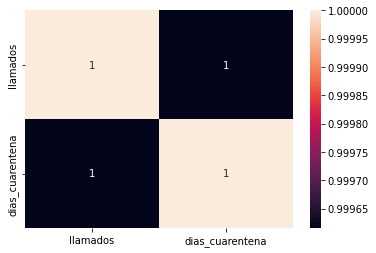

<Figure size 576x576 with 0 Axes>

In [ ]:
correlacion=corr.corr(method='pearson')
sns.heatmap(correlacion, annot=True)
plt.show()

### Serie de tiempo para ver el comportamiento de las dos variables según la fecha

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

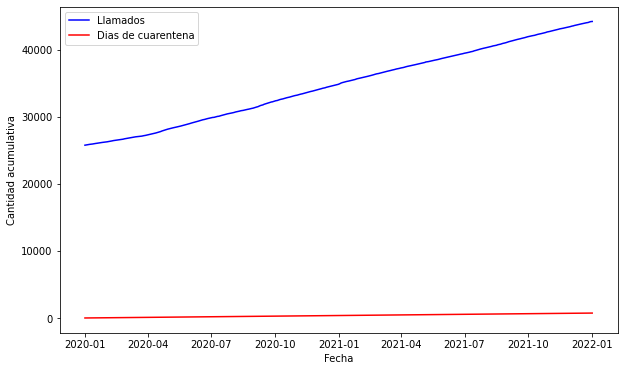

In [ ]:
df = corr
plt.figure(figsize=(10,6))
plt.xlabel("Fecha")
plt.ylabel("Cantidad acumulativa")
plt.plot(df["fecha"], df["llamados"], "-b", label="Llamados")
plt.plot(df["fecha"], df["dias_cuarentena"], "-r", label="Dias de cuarentena")
plt.legend(loc="upper left")
from google.colab import files
plt.savefig("abc.png")
files.download("abc.png") 
